<a href="https://colab.research.google.com/github/Jungkihong07/Deepwave/blob/main/dnn_baseline_v1_cy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading MFCC: 100%|██████████| 4000/4000 [01:24<00:00, 47.11it/s]


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 256)            │       665,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_256 (BatchNormalization)     │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_256 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_128 (BatchNormalization)     │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_128 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 700,417 (2.67 MB)

 Trainable params: 699,649 (2.67 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8676 - loss: 0.3018 - val_accuracy: 0.9750 - val_loss: 0.0791 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9927 - loss: 0.0299 - val_accuracy: 0.9900 - val_loss: 0.0377 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9990 - loss: 0.0109 - val_accuracy: 0.9937 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9993 - loss: 0.0064 - val_accuracy: 0.9962 - val_loss: 0.0205 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9950 - val_loss: 0.0219 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9950 - val_loss: 0.0224 - learning_rate: 0.0010
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.

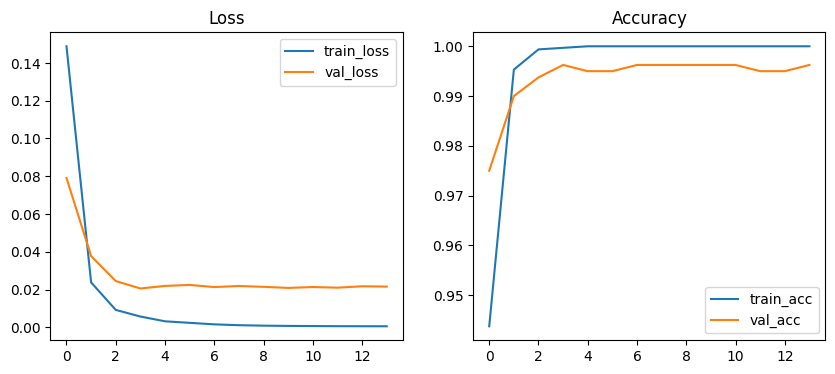

Loading MFCC: 100%|██████████| 2000/2000 [00:35<00:00, 56.88it/s]


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

✅ Classification Report - TEST DATA
              precision    recall  f1-score   support

        Real       0.85      1.00      0.92      1000
        Fake       1.00      0.82      0.90      1000

    accuracy                           0.91      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.92      0.91      0.91      2000

ROC AUC: 0.917


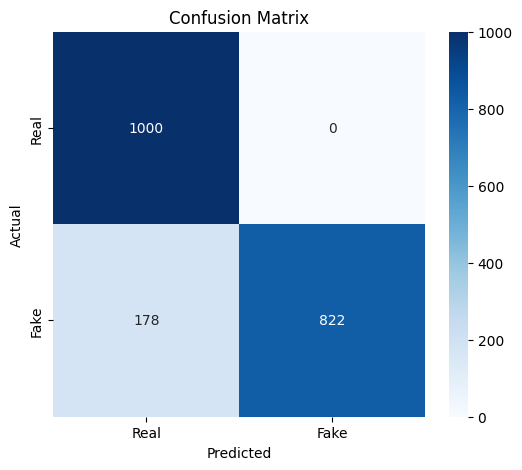

In [9]:
# -------------------------------------------
# 1. 라이브러리 설치 및 임포트
# -------------------------------------------
!pip install umap-learn --quiet

import os
import random
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 재현성 설정
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# -------------------------------------------
# 2. 파일 경로 설정
# -------------------------------------------
train_audio_path = '/content/drive/MyDrive/2501ml_data/train'
train_label_path = '/content/drive/MyDrive/2501ml_data/label/train_label.txt'
test_audio_path  = '/content/drive/MyDrive/2501ml_data/test'
test_label_path  = '/content/drive/MyDrive/2501ml_data/label/test_label.txt'

# -------------------------------------------
# 3. MFCC 시퀀스 로딩 함수 정의
# -------------------------------------------
def load_mfcc_data(audio_path, label_path, max_len=200):
    entries = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                entries.append((parts[1], parts[-1]))
    df = pd.DataFrame(entries, columns=['filename','label'])

    X_list, y_list = [], []
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Loading MFCC"):
        fp = os.path.join(audio_path, row['filename'])
        if not os.path.isfile(fp):
            continue
        try:
            audio, sr = librosa.load(fp, sr=16000)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).T
            if mfcc.shape[0] < max_len:
                mfcc = np.pad(mfcc, ((0, max_len-mfcc.shape[0]), (0,0)), mode='constant')
            else:
                mfcc = mfcc[:max_len]
            X_list.append(mfcc)
            y_list.append(0 if row['label']=='Real' else 1)
        except:
            continue

    return np.array(X_list), np.array(y_list)

# -------------------------------------------
# 4. 데이터 로딩 및 전처리
# -------------------------------------------
max_len = 200
X, y = load_mfcc_data(train_audio_path, train_label_path, max_len)

# 4-1. 채널별 표준화
ns, nt, nf = X.shape
scaler = StandardScaler().fit(X.reshape(-1, nf))
X = scaler.transform(X.reshape(-1, nf)).reshape(ns, nt, nf)

# 4-2. Train/Validation 분리
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42
)

# -------------------------------------------
# 5. DNN 모델 설계 (배치 정규화 추가)
# -------------------------------------------
model = models.Sequential([
    layers.Input(shape=(max_len, nf), name="input_mfcc"),
    layers.Flatten(name="flatten"),

    layers.Dense(256, activation=None, name="dense_256"),
    layers.BatchNormalization(name="bn_256"),
    layers.Activation('relu'),
    layers.Dropout(0.3, name="dropout_256"),

    layers.Dense(128, activation=None, name="dense_128"),
    layers.BatchNormalization(name="bn_128"),
    layers.Activation('relu'),
    layers.Dropout(0.3, name="dropout_128"),

    layers.Dense(1, activation='sigmoid', name="output")
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

# -------------------------------------------
# 6. 학습 설정 (EarlyStopping + ReduceLROnPlateau)
# -------------------------------------------
callbacks = [
    EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
    )
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# -------------------------------------------
# 7. 학습/검증 로그 시각화
# -------------------------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy")
plt.legend()
plt.show()

# -------------------------------------------
# 8. 테스트 데이터 로딩 및 전처리
# -------------------------------------------
X_test, y_test = load_mfcc_data(test_audio_path, test_label_path, max_len)
ns_test = X_test.shape[0]
X_test = scaler.transform(X_test.reshape(-1, nf)).reshape(ns_test, nt, nf)

# -------------------------------------------
# 9. 테스트 데이터 평가
# -------------------------------------------
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

print("\n✅ Classification Report - TEST DATA")
print(classification_report(y_test, y_pred, target_names=['Real','Fake']))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real','Fake'], yticklabels=['Real','Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Loading MFCC: 100%|██████████| 4000/4000 [01:19<00:00, 50.06it/s]


Train: 3200 samples, Val: 800 samples


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 256)            │       665,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_256 (BatchNormalization)     │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act_256 (Activation)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_256 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_128 (BatchNormalization)     │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ act_128 (Activation)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_128 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 700,417 (2.67 MB)

 Trainable params: 699,649 (2.67 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8264 - auc: 0.8988 - loss: 0.3838 - val_accuracy: 0.9663 - val_auc: 0.9948 - val_loss: 0.1259 - learning_rate: 0.0010
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9871 - auc: 0.9992 - loss: 0.0480 - val_accuracy: 0.9875 - val_auc: 0.9983 - val_loss: 0.0469 - learning_rate: 0.0010
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9934 - auc: 0.9999 - loss: 0.0242 - val_accuracy: 0.9900 - val_auc: 0.9984 - val_loss: 0.0275 - learning_rate: 0.0010
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9983 - auc: 1.0000 - loss: 0.0140 - val_accuracy: 0.9937 - val_auc: 0.9984 - val_loss: 0.0224 - learning_rate: 0.0010
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9990 - auc: 1.0000 - loss: 0.0097 - val_accuracy: 0.9937 - val_auc: 0.9984 - val_loss: 0.0243 - learning_rate: 0.0010
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9998 - a

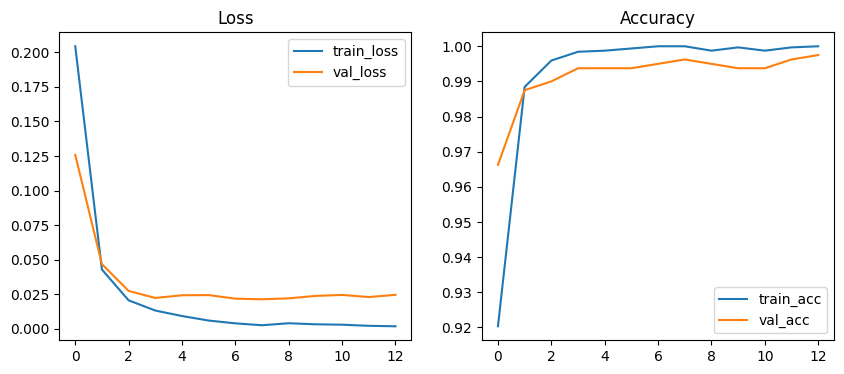

Loading MFCC: 100%|██████████| 2000/2000 [00:33<00:00, 59.18it/s]


Test: 2000 samples
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

✅ Classification Report - TEST DATA
              precision    recall  f1-score   support

        Real       0.85      1.00      0.92      1000
        Fake       1.00      0.83      0.90      1000

    accuracy                           0.91      2000
   macro avg       0.93      0.91      0.91      2000
weighted avg       0.93      0.91      0.91      2000

ROC AUC: 0.916


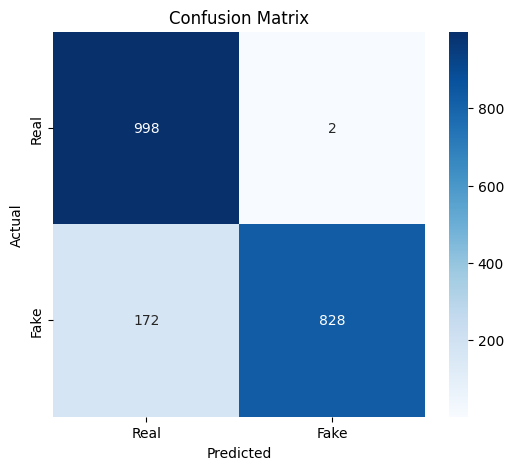

In [14]:
# -------------------------------------------
# 1. 라이브러리 설치 및 임포트
# -------------------------------------------
!pip install umap-learn --quiet

import os
import random
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 재현성 고정
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# -------------------------------------------
# 2. 파일 경로 설정
# -------------------------------------------
train_audio_path = '/content/drive/MyDrive/2501ml_data/train'
train_label_path = '/content/drive/MyDrive/2501ml_data/label/train_label.txt'
test_audio_path  = '/content/drive/MyDrive/2501ml_data/test'
test_label_path  = '/content/drive/MyDrive/2501ml_data/label/test_label.txt'

# -------------------------------------------
# 3. MFCC 시퀀스 로딩 함수 정의
# -------------------------------------------
def load_mfcc_data(audio_path, label_path, max_len=200):
    entries = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                entries.append((parts[1], parts[-1]))
    df = pd.DataFrame(entries, columns=['filename','label'])

    X_list, y_list = [], []
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Loading MFCC"):
        fp = os.path.join(audio_path, row['filename'])
        if not os.path.isfile(fp):
            continue
        try:
            audio, sr = librosa.load(fp, sr=16000)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13).T
            if mfcc.shape[0] < max_len:
                mfcc = np.pad(mfcc, ((0, max_len-mfcc.shape[0]), (0,0)), mode='constant')
            else:
                mfcc = mfcc[:max_len]
            X_list.append(mfcc)
            y_list.append(0 if row['label']=='Real' else 1)
        except Exception:
            continue

    return np.array(X_list), np.array(y_list)

# -------------------------------------------
# 4. 데이터 로딩 및 전처리
# -------------------------------------------
max_len = 200
X, y = load_mfcc_data(train_audio_path, train_label_path, max_len)

# 채널별(StandardScaler) 정규화
ns, nt, nf = X.shape
scaler = StandardScaler().fit(X.reshape(-1, nf))
X = scaler.transform(X.reshape(-1, nf)).reshape(ns, nt, nf)

# Train/Validation 분리 (계층적 분리)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    shuffle=True,
    random_state=seed
)
print(f"Train: {X_train.shape[0]} samples, Val: {X_val.shape[0]} samples")

# -------------------------------------------
# 5. DNN 모델 설계 (BatchNorm + Dropout)
# -------------------------------------------
model = models.Sequential([
    layers.Input(shape=(max_len, nf), name="input_mfcc"),
    layers.Flatten(name="flatten"),

    layers.Dense(256, activation=None, name="dense_256"),
    layers.BatchNormalization(name="bn_256"),
    layers.Activation('relu', name="act_256"),
    layers.Dropout(0.5, name="dropout_256"),

    layers.Dense(128, activation=None, name="dense_128"),
    layers.BatchNormalization(name="bn_128"),
    layers.Activation('relu', name="act_128"),
    layers.Dropout(0.5, name="dropout_128"),

    layers.Dense(1, activation='sigmoid', name="output")
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)
model.summary()

# -------------------------------------------
# 6. 학습 설정 (EarlyStopping + ReduceLROnPlateau)
# -------------------------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    shuffle=True,
    verbose=1
)

# -------------------------------------------
# 7. 학습/검증 로그 시각화
# -------------------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy")
plt.legend()

plt.show()

# -------------------------------------------
# 8. 테스트 데이터 로딩 및 전처리
# -------------------------------------------
X_test, y_test = load_mfcc_data(test_audio_path, test_label_path, max_len)
ns_test = X_test.shape[0]
X_test = scaler.transform(X_test.reshape(-1, nf)).reshape(ns_test, nt, nf)
print(f"Test: {X_test.shape[0]} samples")

# -------------------------------------------
# 9. 테스트 데이터 평가
# -------------------------------------------
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

print("\n✅ Classification Report - TEST DATA")
print(classification_report(y_test, y_pred, target_names=['Real','Fake']))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real','Fake'], yticklabels=['Real','Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
